In [46]:
import os
import apecosm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

## Opening of the input files

In [47]:
mesh_file = os.path.join('..', 'data', 'pacific_mesh_mask.nc')
mesh_file

'../data/pacific_mesh_mask.nc'

In [48]:
mesh = apecosm.open_mesh_mask(mesh_file)
mesh

<xarray.Dataset>
Dimensions:       (y: 108, x: 163, z: 75)
Dimensions without coordinates: y, x, z
Data variables: (12/44)
    e1f           (y, x) float64 ...
    e1t           (y, x) float64 ...
    e1u           (y, x) float64 ...
    e1v           (y, x) float64 ...
    e2f           (y, x) float64 ...
    e2t           (y, x) float64 ...
    ...            ...
    tmask         (z, y, x) int8 ...
    tmaskutil     (y, x) int8 ...
    umask         (z, y, x) int8 ...
    umaskutil     (y, x) int8 ...
    vmask         (z, y, x) int8 ...
    vmaskutil     (y, x) int8 ...
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  08/11/2019 15:49:38 +0100
    history:    Thu Aug 31 09:06:05 2023: ncks -4 -L 9 -d x,60,222 -d y,153,2...
    NCO:        4.7.1

In [49]:
dirin = os.path.join('..', 'data', 'apecosm')
dirin

'../data/apecosm'

In [50]:
const = apecosm.open_constants(dirin)
const

<xarray.Dataset>
Dimensions:            (c: 5, w: 100, dn: 2, gprey: 5, wprey: 100)
Dimensions without coordinates: c, w, dn, gprey, wprey
Data variables: (12/13)
    weight             (c, w) float64 dask.array<chunksize=(5, 100), meta=np.ndarray>
    length             (c, w) float64 dask.array<chunksize=(5, 100), meta=np.ndarray>
    weight_step        (c, w) float64 dask.array<chunksize=(5, 100), meta=np.ndarray>
    weight_step2       (c, w) float64 dask.array<chunksize=(5, 100), meta=np.ndarray>
    length_step        (c, w) float64 dask.array<chunksize=(5, 100), meta=np.ndarray>
    troph_interaction  (dn, c, gprey) int8 dask.array<chunksize=(2, 5, 5), meta=np.ndarray>
    ...                 ...
    select_diatom      (c, w) float64 dask.array<chunksize=(5, 100), meta=np.ndarray>
    select_microzoo    (c, w) float64 dask.array<chunksize=(5, 100), meta=np.ndarray>
    select_mesozoo     (c, w) float64 dask.array<chunksize=(5, 100), meta=np.ndarray>
    select_poc         (c, w) float64 dask.array<chunksize=(5, 100), meta=np.ndarray>
    select_goc         (c, w) float64 dask.array<chunksize=(5, 100), meta=np.ndarray>
    select_flag        (c, w) float64 dask.array<chunksize=(5, 100), meta=np.ndarray>
Attributes:
    Community_0:  commu_1
    Community_1:  commu_2
    Community_2:  commu_3
    Community_3:  commu_4
    Community_4:  commu_5

In [51]:
data = apecosm.open_apecosm_data(dirin, replace_dims={'community': 'c'})
data

<xarray.Dataset>
Dimensions:                (time: 12, y: 108, x: 163, c: 5, w: 100,
                            prey_group: 11)
Coordinates:
  * time                   (time) object 2018-01-16 00:00:00 ... 2018-12-16 0...
Dimensions without coordinates: y, x, c, w, prey_group
Data variables:
    OOPE                   (time, y, x, c, w) float32 dask.array<chunksize=(12, 108, 163, 5, 100), meta=np.ndarray>
    community_diet_values  (time, y, x, c, w, prey_group) float32 dask.array<chunksize=(12, 108, 163, 5, 100, 11), meta=np.ndarray>
    gamma1                 (time, y, x, c, w) float32 dask.array<chunksize=(12, 108, 163, 5, 100), meta=np.ndarray>
    mort_day               (time, y, x, c, w) float32 dask.array<chunksize=(12, 108, 163, 5, 100), meta=np.ndarray>
    repfonct_day           (time, y, x, c, w) float32 dask.array<chunksize=(12, 108, 163, 5, 100), meta=np.ndarray>
Attributes:
    history:  Thu Aug 31 12:13:35 2023: ncks -O -4 -L 9 -d x,60,222 -d y,153,...
    NCO:      netCDF Operators version 5.0.6 (Homepage = http://nco.sf.net, C...

## Extraction of the Nino 3.4 area

In [52]:
lon = mesh['glamt']
lon

<xarray.DataArray 'glamt' (y: 108, x: 163)>
[17604 values with dtype=float32]
Dimensions without coordinates: y, x

In [53]:
lat = mesh['gphit']
lat

<xarray.DataArray 'gphit' (y: 108, x: 163)>
[17604 values with dtype=float32]
Dimensions without coordinates: y, x

In [54]:
tmask = mesh['tmaskutil']
tmask

<xarray.DataArray 'tmaskutil' (y: 108, x: 163)>
[17604 values with dtype=int8]
Dimensions without coordinates: y, x

In [55]:
nino_mask = (abs(lat) <= 5) & (lon <= -120) & (lon >= -170)
nino_mask = nino_mask.astype(int)

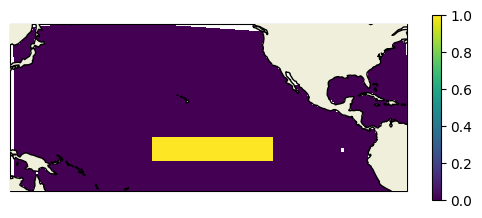

In [56]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs = apecosm.plot_pcolor_map(nino_mask, mesh)
cb= plt.colorbar(cs, shrink=0.5)

In [57]:

oope_nino_34 = apecosm.extract_oope_data(data['OOPE'], mesh, mask_dom=nino_mask)
oope_nino_34 = oope_nino_34.compute()
oope_nino_34 = apecosm.spatial_mean_to_integral(oope_nino_34)
oope_nino_34

<xarray.DataArray (time: 12, c: 5, w: 100)>
array([[[3.76330604e+18, 6.46881394e+18, 9.21219403e+18, ...,
         4.57829544e-21, 4.70236455e-21, 4.83308919e-21],
        [8.31878302e+15, 1.68742299e+16, 2.69585123e+16, ...,
         1.44798139e+08, 2.63084229e+07, 2.45342518e+06],
        [1.63609258e+19, 3.09981020e+19, 4.34089341e+19, ...,
         2.24929333e+12, 1.86312499e+12, 1.45490139e+12],
        [2.71755534e+20, 4.99377927e+20, 7.27875982e+20, ...,
         1.20440683e+11, 3.47189114e+09, 2.49062092e+07],
        [4.10934555e+15, 8.18891037e+15, 1.23467175e+16, ...,
         7.13928179e+02, 1.13519483e+02, 1.33322181e+01]],

       [[3.53209475e+18, 6.03095913e+18, 8.56813371e+18, ...,
         4.56126576e-21, 4.67070307e-21, 4.78145126e-21],
        [8.28024712e+15, 1.72616491e+16, 2.74533239e+16, ...,
         5.56093372e+07, 9.50315261e+06, 8.16430398e+05],
        [1.74506408e+19, 3.34391206e+19, 4.52348264e+19, ...,
         1.92840222e+12, 1.60685803e+12, 1.26251900e+12],
        [3.02959227e+20, 5.21625722e+20, 7.23046652e+20, ...,
         1.25977440e+11, 3.64459158e+09, 2.53204613e+07],
        [4.16430672e+15, 8.00122612e+15, 1.20754710e+16, ...,
...
         5.61035228e-21, 5.92015355e-21, 6.25555925e-21],
        [7.94457432e+16, 1.64504032e+17, 2.60667506e+17, ...,
         8.91516398e+08, 1.64976203e+08, 1.60975676e+07],
        [1.31118039e+19, 2.62787175e+19, 3.89990934e+19, ...,
         1.90969049e+12, 1.56395043e+12, 1.22438631e+12],
        [3.31146093e+20, 5.56421871e+20, 7.11770083e+20, ...,
         1.70336054e+11, 5.22115479e+09, 3.80915590e+07],
        [5.53540002e+15, 1.15042124e+16, 1.82712154e+16, ...,
         2.75347211e+03, 4.07116771e+02, 3.87719088e+01]],

       [[9.88989540e+18, 1.87575651e+19, 2.81808959e+19, ...,
         5.75567309e-21, 6.11960223e-21, 6.51484269e-21],
        [8.61643084e+16, 1.66087943e+17, 2.58280992e+17, ...,
         9.82859884e+08, 1.87002386e+08, 1.84389427e+07],
        [1.35121726e+19, 2.74044317e+19, 3.93196655e+19, ...,
         1.87520892e+12, 1.53484751e+12, 1.20111300e+12],
        [3.66538658e+20, 5.39588792e+20, 6.45368587e+20, ...,
         1.76586508e+11, 5.46093389e+09, 3.91230736e+07],
        [4.72355617e+15, 9.74609127e+15, 1.52519257e+16, ...,
         2.28526774e+03, 3.24666789e+02, 2.97906204e+01]]])
Coordinates:
  * time     (time) object 2018-01-16 00:00:00 ... 2018-12-16 00:00:00
Dimensions without coordinates: c, w

In [58]:
biomass_nino_34 = apecosm.extract_oope_size_integration(oope_nino_34, const)
biomass_nino_34

<xarray.DataArray (time: 12, c: 5)>
dask.array<sum-aggregate, shape=(12, 5), dtype=float64, chunksize=(12, 5), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2018-01-16 00:00:00 ... 2018-12-16 00:00:00
Dimensions without coordinates: c

In [59]:
total_biomass_nino_34 = biomass_nino_34.sum(dim='c')
total_biomass_nino_34

<xarray.DataArray (time: 12)>
dask.array<sum-aggregate, shape=(12,), dtype=float64, chunksize=(12,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2018-01-16 00:00:00 ... 2018-12-16 00:00:00

Text(0, 0.5, 'Biomass (J)')

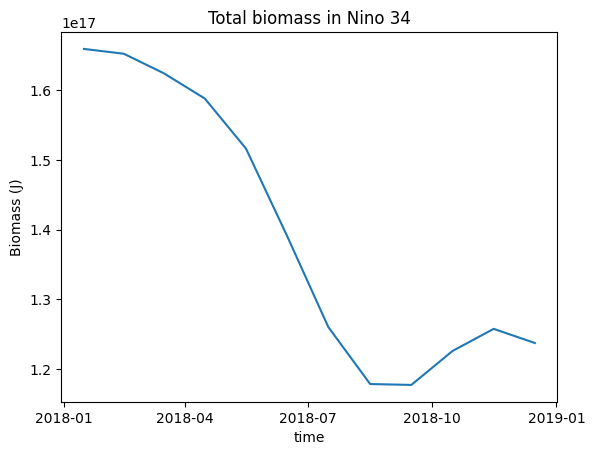

In [60]:
ax = plt.gca()
total_biomass_nino_34.plot()
ax.set_title('Total biomass in Nino 34')
ax.set_ylabel('Biomass (J)')
